In [1]:
###IMPORT MODULES
import numpy as np 
from tools.component_tools import Component
from tools.component_tools import Fluid
from tools.component_tools import Membrane
import tools.materials as materials
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from tools.component_tools import BreedingBlanket
import mph 
D0vec=np.array([1E-10,1E-8,1E-6,1E-4,1E-2])
        
eff_coms_v=np.array([])
eff_py=np.array([])
client = mph.start()
model = client.load('PAV_MS_2species.mph')
for D in D0vec:
        U0=3
        T=850
        c0=0
        mat=materials.Flibe(T)
        T_hot_prim=900
        T_cold_prim=800
        Q=1E9
        d_hyd=0.01
        L=8
        D=D
        thick=2E-2
        K_S=4.41E-3
        k_d=1E16
        k_r=1E16
        K_H=mat.Solubility
        D_flibe=mat.D
        D_flibe=1E-5
        flibe=Fluid(T=T, Solubility=K_H, MS=True,D=D_flibe, d_Hyd=d_hyd ,mu=mat.mu,rho=mat.rho,U0=U0, c0=c0,k=mat.k,
                cp=mat.cp)
        BB=BreedingBlanket(Q=Q,TBR=1.08,T_out=T_hot_prim,T_in=T_cold_prim,fluid=flibe )
        BB.get_cout()
        c0=BB.c_out
        var_vec=[T,c0,d_hyd,L,D,thick,K_S,K_H,D_flibe,U0]
        var_vec_str=['T','c0','d_hyd','L','D_St','thick','K_S','K_H','D_flibe','U0']
        Steel = Membrane( T=T,
                D=D,
                thick=thick,
                K_S=K_S,
                k_d=k_d,
                k_r=k_r,k=21)
        flibe.update_attribute('c0',c0)
        PAV = Component(c_in=c0,  fluid=flibe, membrane=Steel)
        PAV.get_adimensionals()
        U = PAV.get_global_HX_coeff(0) 
        print("h",PAV.H,"W",PAV.W,"H/W",PAV.H/PAV.W)
        PAV.get_efficiency(L)
        PAV.get_regime()        


        


        for i,var in enumerate(var_vec):
                model.parameter(var_vec_str[i], str(var))
        model.build()
        model.mesh()


        a=model.parameters()
        print(a)

        model.solve()
        eff_coms=model.evaluate(['r','z','eff'],'Study 1//Solution 1')
        model.reset()


        eff_coms=np.average(eff_coms[-1])
        eff_coms_v=np.append(eff_coms_v,eff_coms)
        plt.plot((1-PAV.eff)*100,eff_coms)
        print("analytical",(1-PAV.eff)*100,"COMSOL",eff_coms*100, "err [%]",(((1-PAV.eff)/eff_coms)-1)*100)
        eff_py=np.append(eff_py,PAV.eff)



h 2.336796242014352e+23 W 7.412642720189787e+26 H/W 0.0003152446880583667
c 0.00030322093705177535 c_wl 0.00030298345948306005 mass transfer -4.476884512078767e-11 diffusion 4.476884512078309e-11
c 0.0003032206958728117 c_wl 0.0003029832183985771 mass transfer -4.476882730945863e-11 diffusion 4.47688273094543e-11
c 0.00030322045469394405 c_wl 0.0003029829773141901 mass transfer -4.47688094981296e-11 diffusion 4.4768809498125523e-11
c 0.0003032202135151723 c_wl 0.0003029827362298991 mass transfer -4.4768791686800564e-11 diffusion 4.4768791686796745e-11
c 0.00030321997233649655 c_wl 0.000302982495145704 mass transfer -4.4768773875471533e-11 diffusion 4.476877387546797e-11
c 0.00030321973115791673 c_wl 0.0003029822540616049 mass transfer -4.476875606413228e-11 diffusion 4.476875606413921e-11
c 0.00030321948997943287 c_wl 0.00030298201297760167 mass transfer -4.4768738252813465e-11 diffusion 4.4768738252810435e-11
c 0.00030321924880104495 c_wl 0.00030298177189369443 mass transfer -4.476872

com.comsol.util.exceptions.FlException: Exception:
	com.comsol.util.exceptions.FlException: Failed to find a solution
	(rethrown as com.comsol.util.exceptions.FlException)
Messages:
	The following feature has encountered a problem
	- Feature: Stationary Solver 2 (sol1/s2)

	Failed to find a solution

	Maximum number of segregated iterations reached

	Returned solution is not converged

	Not all parameter steps returned


c_in: 0.00030322093705177535
eff: 0.9042999842611796
fluid: <tools.component_tools.Fluid object at 0x000002492EB075D0>
membrane: <tools.component_tools.Membrane object at 0x000002495C0EFDD0>
H: 2.336796242014352e+23
W: 7.412642720189786e+18
U: 118.56550543177896
J_perm: -5.16921988220024e-08
c_in: 0.00030322093705177535
eff: 0.9042999842611796
fluid: <tools.component_tools.Fluid object at 0x000002492EB075D0>
membrane: <tools.component_tools.Membrane object at 0x000002495C0EFDD0>
H: 2.336796242014352e+23
W: 7.412642720189786e+18
U: 118.56550543177896
J_perm: -5.16921988220024e-08
T: 850
Solubility: 0.000454
MS: True
D: 2.4399672021371085e-09
k_t: 9.425910279226817e-05
c0: 0.00030322093705177535
p_H2: 0.6678875265457608
d_Hyd: 0.01
mu: 0.009616515365587481
rho: 1998.2
U0: 3
k: 1.1
cp: 2386
T: 850
D: 0.01
thick: 0.02
k_d: 1e+16
K_S: 0.00441
k_r: 1e+16
k: 21
31524.468805836674
Sherwood 386.3129910504899
schmidt 1972.3990587619885


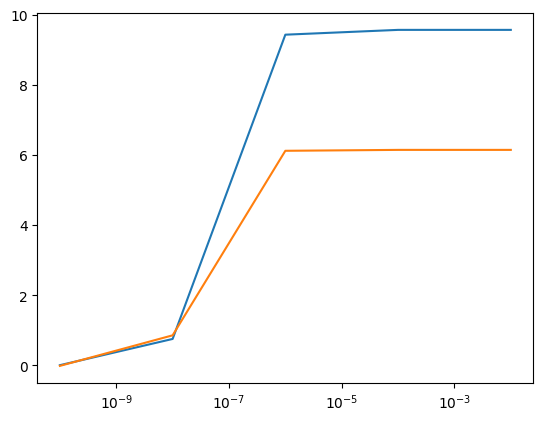

In [ ]:
import tools.correlations as corr
PAV.inspect()

PAV.get_adimensionals()
PAV.inspect()
PAV.fluid.inspect()
PAV.membrane.inspect()
print(PAV.H/PAV.W)
model.save()
plt.semilogx(D0vec,(1-eff_py)*100)
plt.semilogx(D0vec,eff_coms_v*100)
print("Sherwood",corr.Sherwood(
                        corr.Schmidt(PAV.fluid.D, PAV.fluid.mu, PAV.fluid.rho),
                        corr.Re(PAV.fluid.rho, PAV.fluid.U0, PAV.fluid.d_Hyd, PAV.fluid.mu),))
print("schmidt",corr.Schmidt(PAV.fluid.D, PAV.fluid.mu, PAV.fluid.rho))

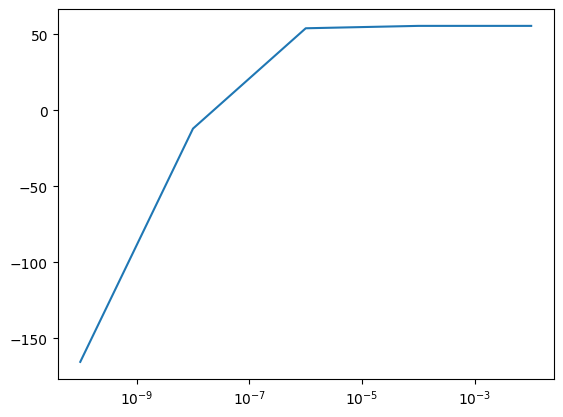

In [ ]:
plt.semilogx(D0vec,(((1-eff_py)/eff_coms_v)-1)*100)
